In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

# Q1. Downloading the data

### Read the data for January. How many records are there?



In [15]:
fhv_jan_df = pd.read_parquet("data/fhv_tripdata_2021-01.parquet")
fhv_feb_df = pd.read_parquet("data/fhv_tripdata_2021-02.parquet")

**answer**

In [16]:
fhv_jan_df.shape

(1154112, 7)

In [17]:
fhv_feb_df.shape

(1037692, 7)

# Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

In [18]:
fhv_jan_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [19]:
fhv_jan_df['duration'] = fhv_jan_df["dropOff_datetime"] - fhv_jan_df["pickup_datetime"]

In [20]:
fhv_jan_df.duration = fhv_jan_df.duration.apply(lambda td: td.total_seconds() / 60)

In [21]:
fhv_jan_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [22]:
fhv_feb_df["duration"] = fhv_feb_df["dropOff_datetime"] - fhv_feb_df["pickup_datetime"]
fhv_feb_df["duration"] = fhv_feb_df["duration"].apply(lambda td: td.total_seconds() / 60)

**answer**

In [23]:
fhv_jan_df["duration"].mean()

19.167224093791006

In [24]:
fhv_feb_df["duration"].mean()

20.706986225199763

# Data preparation

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

<AxesSubplot:>

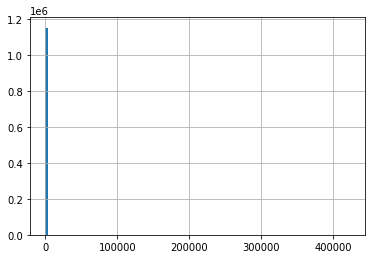

In [26]:
fhv_jan_df["duration"].hist(bins=100)

In [27]:
fhv_jan_df[fhv_jan_df["duration"] > 100000]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
345570,B03055,2021-01-11 05:52:43,2021-11-01 06:03:46,NaN,55.0,None,B03055,423371.05


In [28]:
fhv_jan_df_filtered = fhv_jan_df[(fhv_jan_df["duration"] >= 1) & (fhv_jan_df["duration"] <= 60)]

In [29]:
fhv_feb_df_filtered = fhv_feb_df[(fhv_feb_df["duration"] >= 1) & (fhv_feb_df["duration"] <= 60)]

**answer**

In [30]:
fhv_jan_df.shape[0] - fhv_jan_df_filtered.shape[0]

44286

# Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1"

What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)

In [13]:
fhv_jan_df_filtered.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [14]:
fhv_jan_df_filtered.shape

(1109826, 8)

**answer**

In [15]:
fhv_jan_df_filtered["PUlocationID"].isna().sum() / len(fhv_jan_df_filtered)

0.8352732770722617

In [16]:
# fhv_jan_df_filtered[["PUlocationID", "DOlocationID"]].fillna(value=-1, inplace=True)
fhv_jan_df_filtered[["PUlocationID", "DOlocationID"]] = \
            fhv_jan_df_filtered.loc[:,["PUlocationID", "DOlocationID"]].fillna(value=-1)

/tmp/ipykernel_20538/2747843146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_jan_df_filtered[["PUlocationID", "DOlocationID"]] = \


In [17]:
fhv_jan_df_filtered.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000


In [31]:
fhv_feb_df_filtered[["PUlocationID", "DOlocationID"]] = \
            fhv_feb_df_filtered.loc[:,["PUlocationID", "DOlocationID"]].fillna(value=-1)

/tmp/ipykernel_2538/863657657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_feb_df_filtered[["PUlocationID", "DOlocationID"]] = \


In [32]:
fhv_feb_df_filtered.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,None,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1.0,61.0,None,B00037,8.966667


# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries
- Fit a dictionary vectorizer
- Get a feature matrix from it  
What's the dimensionality of this matrix? (The number of columns)

In [33]:
fhv_jan_df_filtered["PUlocationID"] = fhv_jan_df_filtered["PUlocationID"].astype('str')
fhv_jan_df_filtered["DOlocationID"] = fhv_jan_df_filtered["DOlocationID"].astype('str')

/tmp/ipykernel_2538/3367440432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_jan_df_filtered["PUlocationID"] = fhv_jan_df_filtered["PUlocationID"].astype('str')
/tmp/ipykernel_2538/3367440432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_jan_df_filtered["DOlocationID"] = fhv_jan_df_filtered["DOlocationID"].astype('str')


In [34]:
fhv_feb_df_filtered["PUlocationID"] = fhv_feb_df_filtered["PUlocationID"].astype('str')
fhv_feb_df_filtered["DOlocationID"] = fhv_feb_df_filtered["DOlocationID"].astype('str')

/tmp/ipykernel_2538/3191485681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_feb_df_filtered["PUlocationID"] = fhv_feb_df_filtered["PUlocationID"].astype('str')
/tmp/ipykernel_2538/3191485681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhv_feb_df_filtered["DOlocationID"] = fhv_feb_df_filtered["DOlocationID"].astype('str')


In [35]:
categorical = ["PUlocationID", "DOlocationID"]

dv = DictVectorizer()

train_dicts = fhv_jan_df_filtered[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)


val_dicts = fhv_feb_df_filtered[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [36]:
target = 'duration'
y_target = fhv_jan_df_filtered[target]

y_val = fhv_feb_df_filtered[target]

**answer**

In [37]:
X_train.shape

(1109826, 525)

In [38]:
X_val.shape

(990113, 525)

# Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters
- Calculate the RMSE of the model on the training data  
What's the RMSE on train

**answer**

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_target)

predict = lr.predict(X_train)
mean_squared_error(predict, y_target, squared=False)

10.528519368414868

# Q6. Evaluating the model

In [129]:
y_pred = lr.predict(X_val)

mean_squared_error(y_pred,y_val, squared=False)

11.014285976807088